In [ ]:
!pip install tensorflow

In [ ]:
%tensorflow_version 2.x

In [5]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [6]:
string = tf.Variable("this is a string", tf.string)
number = tf.Variable(234, tf.int16)
floating = tf.Variable(3.456, tf.float64)

In [8]:
rank1_tensor = tf.Variable(["Test"], tf.string)
rank2_tensor = tf.Variable([["Hey", "Hello"],["Hello", "Hey"]], tf.string)
tf.rank(rank2_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [11]:
print(tf.shape(rank2_tensor))
rank1_tensor.shape

tf.Tensor([2 2], shape=(2,), dtype=int32)


TensorShape([1])

In [12]:
tensor1 = tf.ones([1, 2, 3])
tensor2 = tf.reshape(tensor1, [2, 3, 1])
tensor3 = tf.reshape(tensor2, [3, -1]) # -1 tells the tensor to calculate the size of the dimension in that place

print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [13]:
matrix = [[1,2,3,4,5],
          [6,7,8,9,10],
          [11,12,13,14,15],
          [16,17,18,19,20]]

tensor = tf.Variable(matrix, dtype=tf.int32)
print(tf.rank(tensor))
print(tensor.shape)

tf.Tensor(2, shape=(), dtype=int32)
(4, 5)


In [16]:
three = tensor[0,2]  # selects the 3rd element from the 1st row
print(three)  # -> 3

row1 = tensor[0]  # selects the first row
print(row1)

column1 = tensor[:, 0]  # selects the first column
print(column1)

row_2_and_4 = tensor[1::2]  # selects second and fourth row
print(row_2_and_4)

column_1_in_row_2_and_3 = tensor[1:3, 0]
print(column_1_in_row_2_and_3)


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)
tf.Tensor([ 1  6 11 16], shape=(4,), dtype=int32)
tf.Tensor(
[[ 6  7  8  9 10]
 [16 17 18 19 20]], shape=(2, 5), dtype=int32)
tf.Tensor([ 6 11], shape=(2,), dtype=int32)


LINEAR REGRESSION ALGORITHM

In [17]:
import matplotlib.pyplot as plt
import numpy as np

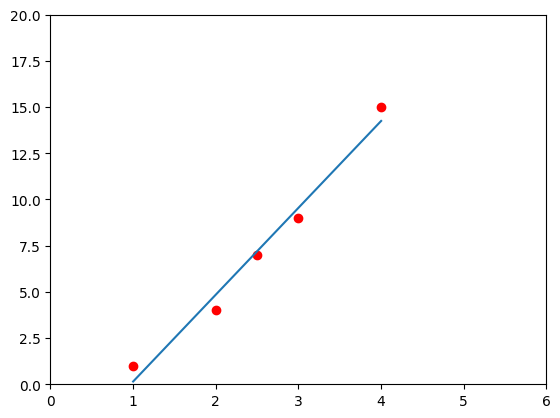

In [20]:
x = [1, 2, 2.5, 3, 4]
y= [1, 4, 7, 9, 15]
plt.plot(x, y, 'ro') # 'ro' means red circles
plt.axis([0, 6, 0, 20]) # 0-6 in x-axis and 0-20 in y-axis
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [ ]:
!pip install -q sklearn

In [23]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [24]:
# Load dataset.
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [25]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [26]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [27]:
dftrain.shape

(627, 9)

In [29]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

<Axes: >

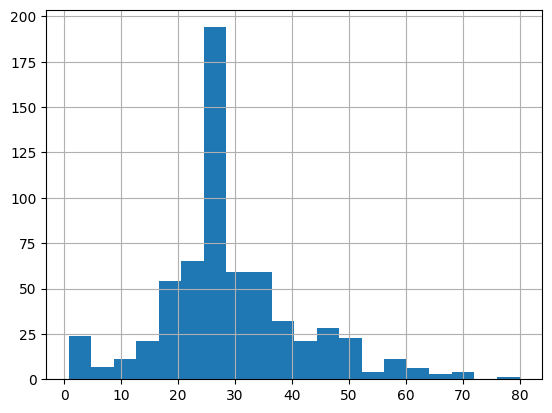

In [30]:
dftrain.age.hist(bins=20)

<Axes: >

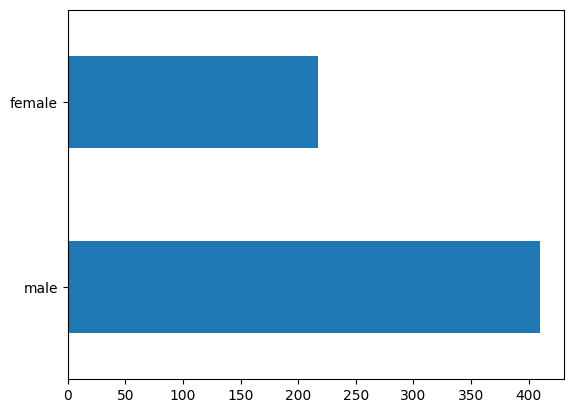

In [31]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

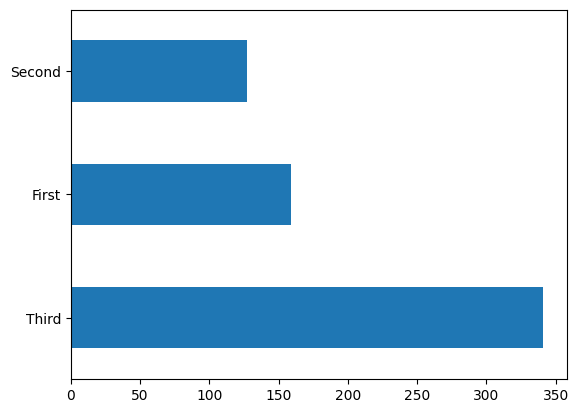

In [32]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

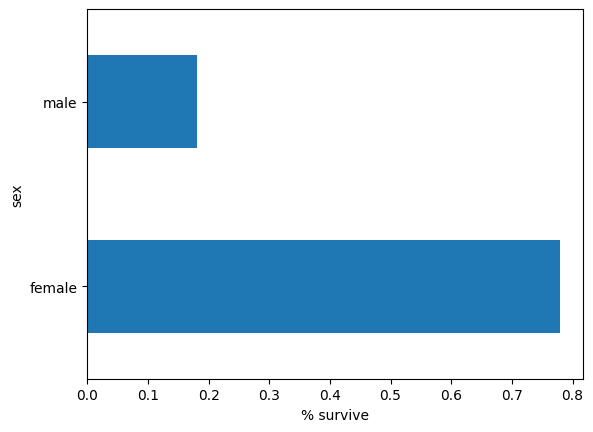

In [33]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [ ]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck',
                       'embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

In [35]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
  def input_function():  # inner function, this will be returned
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  # create tf.data.Dataset object with data and its label
    if shuffle:
      ds = ds.shuffle(1000)  # randomize order of data
    ds = ds.batch(batch_size).repeat(num_epochs)  # split dataset into batches of 32 and repeat process for number of epochs
    return ds  # return a batch of the dataset
  return input_function  # return a function object for use

train_input_fn = make_input_fn(dftrain, y_train)  # here we will call the input_function that was returned to us to get a dataset object we can feed to the model
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

In [ ]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
# We create a linear estimtor by passing the feature columns we created earlier

In [37]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy'])  # the result variable is simply a dict of stats about our model

0.7462121


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


<Axes: title={'center': 'predicted probabilities'}, ylabel='Frequency'>

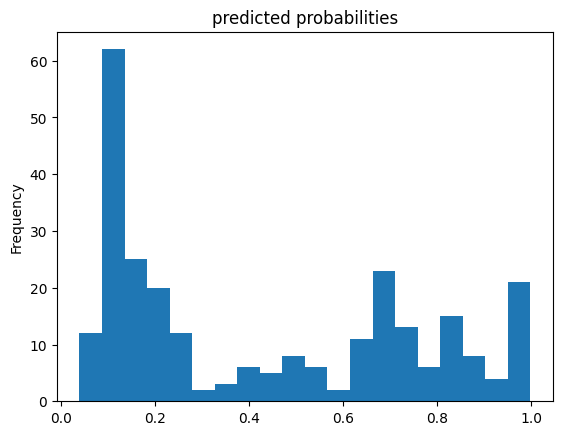

In [38]:
pred_dicts = list(linear_est.predict(eval_input_fn))
probs = pd.Series([pred['probabilities'][1] for pred in pred_dicts])

probs.plot(kind='hist', bins=20, title='predicted probabilities')

CLASSIFICATION

In this example I use a TensorFlow estimator to classify flowers.

Dataset
This specific dataset separates the flowers into three different classes of species

-setosa

-versicolor

-virginica

The information about each flower is the following

-sepal length

-sepal width

-petal length

-petal width

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd


In [3]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [4]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMN_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMN_NAMES, header=0)

573/573 [==============================] - 0s 0us/step


In [5]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [6]:
#pop the species column off and use it as label
train_y = train.pop('Species')
test_y = test.pop('Species')

train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [7]:
train.shape

(120, 4)

In [18]:
# input function
def input_fn(features, labels, training=True, batch_size=256):
  dataset = tf.data.Dataset.from_tensor_slices((dict(features), labels)) #convert the inputs to a Dataset
  if training:
    dataset = dataset.shuffle(1000).repeat() #shuffle and repeat if you are in training mode

  return dataset.batch(batch_size)

In [12]:
#future columns
my_features_columns = []
for key in train.keys():
  my_features_columns.append(tf.feature_column.numeric_column(key=key))
print(my_features_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [ ]:
#build a DNN with two layers with 30 and 10 hidden nodes for each
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_features_columns, hidden_units=[30, 10], n_classes=3
)

In [20]:
#training the model
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000
)
#create a lamnda to avoid creating an inner function previously

Instructions for updating:
Use standard file utilities to get mtimes.


In [21]:
eval_result = classifier.evaluate(
    input_fn=lambda: input_fn(test, test_y, training=False))

print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

Instructions for updating:
Use tf.keras instead.



Test set accuracy: 0.967



In [25]:
def input_fn(features, batch_size=256):
    # Convert the inputs to a Dataset without labels.
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
  valid = True
  while valid:
    val = input(feature + ": ")
    if not val.isdigit(): valid = False

  predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(
        SPECIES[class_id], 100 * probability))

Please type numeric values as prompted.
SepalLength: 23
SepalLength: 12
SepalLength: 12
SepalLength: 3
SepalLength: 4
SepalLength: 2
SepalLength: 0.5
SepalWidth: 2
SepalWidth: 0.4
PetalLength: 0.5
PetalWidth: 0.3


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.


Prediction is "Versicolor" (43.2%)


In [26]:
#here is some example input and expected classes
expected = ['Setosa', 'Versicolor', 'Virginica']
predict_x = {
    'SepalLength': [5.1, 5.9, 6.9],
    'SepalWidth': [3.3, 3.0, 3.1],
    'PetalLength': [1.7, 4.2, 5.4],
    'PetalWidth': [0.5, 1.5, 2.1],
}

HIDDEN MARKOV MODEL

Creating a Hidden Markov Model that can predict the weather

In [1]:
!pip install tensorflow_probability==0.8.0rc0 --user --upgrade

In [5]:
!pip install --upgrade tensorflow-probability
import tensorflow_probability as tfp
import tensorflow as tf

We will model a simple weather system and try to predict the temperature on each day given the following information.

1. Cold days are encoded by a 0 and hot days are encoded by a 1.

2. The first day in our sequence has an 80% chance of being cold.

3. A cold day has a 30% chance of being followed by a hot day.

4. A hot day has a 20% chance of being followed by a cold day.

5. On each day the temperature is normally distributed with mean and standard deviation 0 and 5 on a cold day and mean and standard deviation 15 and 10 on a hot day

In this example, on a hot day the average temperature is 15 and ranges from 5 to 25.

In [6]:
!pip install --upgrade tensorflow

In [7]:
tfd = tfp.distributions  # making a shortcut for later on
initial_distribution = tfd.Categorical(probs=[0.2, 0.8])  # Refer to point 2 above
transition_distribution = tfd.Categorical(probs=[[0.5, 0.5],
                                                 [0.2, 0.8]])  # refer to points 3 and 4 above
observation_distribution = tfd.Normal(loc=[0., 15.], scale=[5., 10.])  # refer to point 5 above

# the loc argument represents the mean and the scale is the standard devitation

In [8]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7)

In [9]:
mean = model.mean()

with tf.compat.v1.Session() as sess:
  print(mean.numpy())

[11.999999 11.1      10.830001 10.748999 10.724699 10.71741  10.715222]
